In [27]:
import sys
print('Python : {}'.format(sys.version))
import pandas
print('Pandas : {}'.format(pandas.__version__)) 
import scipy
print('Scipy : {}'.format(scipy.__version__))
import numpy
print('Numpy : {}'.format(numpy.__version__))
import sklearn
print('Sklearn : {}'.format(sklearn.__version__))
import matplotlib
print('Matplotlib : {}'.format(matplotlib.__version__))


Python : 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Pandas : 0.23.4
Scipy : 1.1.0
Numpy : 1.14.5
Sklearn : 0.19.1
Matplotlib : 2.2.2


In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [4]:
#loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-lenght','sepal-width','petal-lenght','petal-width','class']
dataset = pd.read_csv(url,names=names)

In [5]:
print(dataset.shape)

(150, 5)


In [6]:
#take a peek of the dataset
dataset.head(4)

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
# showing  bottom of  the dataset
dataset.tail(4)

,sepal-lenght,sepal-width,petal-lenght,petal-width,class
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
#statistical summary
print(dataset.describe())

       sepal-lenght  sepal-width  petal-lenght  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
#  class distribution 
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


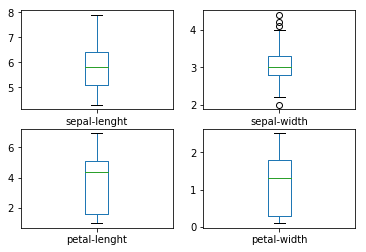

In [10]:
# univariate plot-box and whisker plots
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

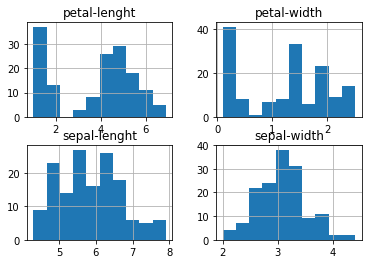

In [11]:
# histogram of the variable
dataset.hist()
pyplot.show()

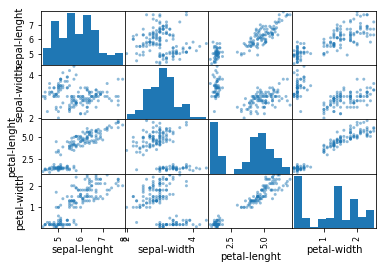

In [12]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [28]:
# creating a validation dataset
#spliting dataset
data = dataset.values
X =  data[:,0:4]
Y = data[:,4]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [29]:
# logistic Regression
# Linear Discriminant Analysis
# k-Nearest neighbors 
# Classification and Regression trees
# Gaussion Naive Bayes
# support Vector machines

# building models
models = []
models.append(('LR',LogisticRegression(solver='liblinear' ,multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('kNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))



In [30]:
# evaluate the  created Models
results = []
names = []
for name,model in models :
    kfold = StratifiedKFold(n_splits=10,random_state=1)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'% (name, cv_results.mean(),cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
kNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


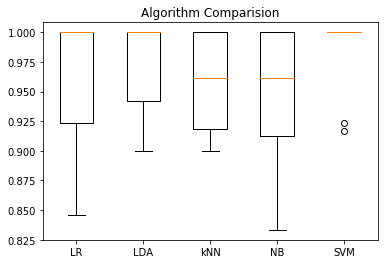

In [31]:
# compare our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparision')
pyplot.show()

In [32]:
# make predictions on svm
model = SVC(gamma='auto')
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [33]:
# evaluate predictions
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

